## PRACA DOMOWA

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do poniedziałku **20 listopada 2023 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*2 punkty*). Rozważmy układ równań Lotki-Volterry (czyli model drapieżnik-ofiara):
$$x' = ax - bxy, \qquad y' = dxy - cy,$$
gdzie $x$ to liczność populacji ofiary, $y$ to liczność populacji drapieżnika. Stwórz pole kierunków i sprawdź, czy możliwe jest symboliczne wyznaczenie rozwiązania tego problemu dla następujących danych:
$$ a = 0{,}4,\quad b = 0{,}002,\quad c = 0{,}7,\quad d = 0{,}001,\quad x(0) = 600,\quad y(0) = 400.$$

**D2** (*2 punkty*). Rozwiąż numerycznie (korzystając z domyślnej wbudowanej metody) układ równań Lotki-Volterry z zadania **D1**, następnie stwórz wykres rozwiązań (zależności $x(t)$ i $y(t)$), a także nanieś na pole kierunków trajektorię rozwiązania.

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
sympy.init_printing()

## Zadanie D1

Deklarujemy używane symbole, funkcje oraz wartości parametrów a,b,c,d

In [321]:
t = sympy.symbols('t')

In [322]:
a = 0.4
b = 0.002
c = 0.07
d = 0.001

In [323]:
x = sympy.Function('x')
y = sympy.Function('y')

Tworzymy pole kierunków

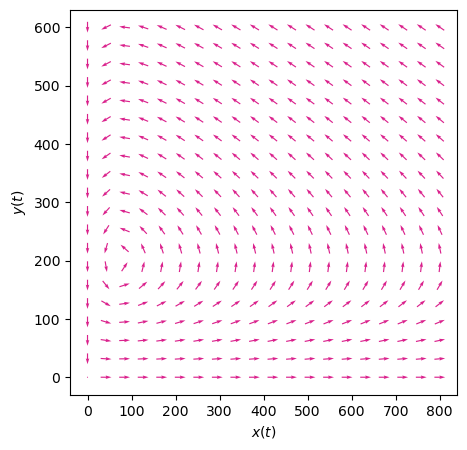

In [324]:
f1 = a*x(t) - b*x(t)*y(t)
f1_np = sympy.lambdify((t, x(t), y(t)), f1, 'numpy')
f2 = d*x(t)*y(t) -c*y(t)
f2_np = sympy.lambdify((t, x(t), y(t)), f2, 'numpy')

x_np = np.linspace(0, 800, 20)
y_np = np.linspace(0, 600, 20)
X, Y = np.meshgrid(x_np, y_np)
U = f1_np(0, X, Y)
V = f2_np(0, X, Y) # przyjmujemy 0 jako wartość początkową dla t

length = np.sqrt(U**2 + V**2)
mask = length != 0  # Unikamy dzielenia przez zero
U[mask] /= length[mask]
V[mask] /= length[mask]

_, axes = plt.subplots(figsize=(5, 5))
axes.quiver(X, Y, U, V, pivot='mid', color='#DA218C')
axes.set_xlabel("$x(t)$", fontsize=10)
axes.set_ylabel("$y(t)$", fontsize=10)

plt.show()

Możemy też narysować pole kierunków z wykorzystaniem streamplot

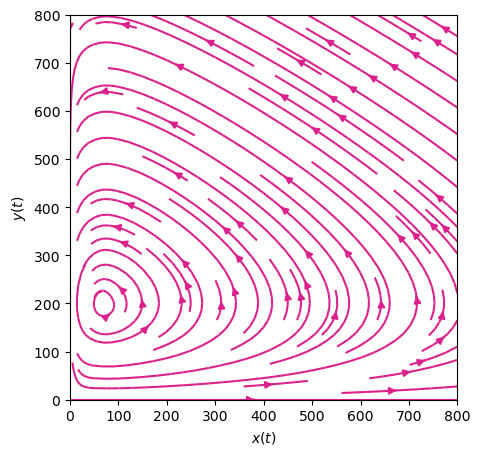

In [346]:
f1 = a*x(t) - b*x(t)*y(t)
f1_np = sympy.lambdify((t, x(t), y(t)), f1, 'numpy')
f2 = d*x(t)*y(t) -c*y(t)
f2_np = sympy.lambdify((t, x(t), y(t)), f2, 'numpy')

x_np = np.linspace(0, 800, 20)
y_np = np.linspace(0, 800, 20)
X, Y = np.meshgrid(x_np, y_np)
U = f1_np(0, X, Y)
V = f2_np(0, X, Y) # przyjmujemy 0 jako wartość początkową dla t

length = np.sqrt(U**2 + V**2)
mask = length != 0  # Unikamy dzielenia przez zero
U[mask] /= length[mask]
V[mask] /= length[mask]

_, axes = plt.subplots(figsize=(5, 5))
axes.streamplot(X, Y, U, V, color='#DA218C')
axes.set_xlabel("$x(t)$", fontsize=10)
axes.set_ylabel("$y(t)$", fontsize=10)

plt.show()

Deklarujemy równości, dla których będziemy szukach rozwiązań

In [326]:
expr1 = sympy.Eq(x(t).diff(t),a*x(t)-b*x(t)*y(t))
expr2 = sympy.Eq(y(t).diff(t), d*x(t)*y(t)-c*y(t))

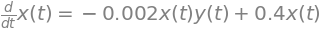

In [327]:
expr1

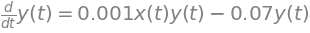

In [328]:
expr2

Za pomocą funkcji dsolve spróbujemy symbolicznie wyznaczyć rozwiązania problemu

In [329]:
sol=sympy.dsolve([expr1, expr2], ics={x(0): 600, y(0):400})

ValueError: Couldn't solve for initial conditions

In [330]:
sympy.classify_ode(expr1, x(t))

('factorable',
 'separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral')

In [331]:
sympy.classify_ode(expr2, y(t))

('factorable',
 'separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral')

Dla zadanych danych i warunków początkowych nie jest możliwe symboliczne rozwiązanie tego problemu.
Przeanalizowałam również możliwość zadania argumentu hint na podstawie klasyfikacji, ale wówczas nadal nie jest możliwe symboliczne rozwiązanie tego problemu.

## Zadanie D2

Rozwiązujemy numerycznie układ równań z zadania D1

In [334]:
def lotka_volterra(t, z):
    x, y = z[0], z[1]
    dxdt = a*x - b*x*y
    dydt = d*x*y - c*y
    return [dxdt, dydt]

warunki_poczatkowe = [600, 400]

t_span = [0,65]

solution = integrate.solve_ivp(lotka_volterra, t_span, warunki_poczatkowe)

solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 194
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11632396,  1.27956357,  2.51064838,  3.460703  ,
        4.41075762,  5.41336497,  6.48741654,  7.66906805,  8.99596794,
       10.52222782, 12.33824102, 14.62732796, 17.96969548, 22.37438942,
       27.92661207, 38.05484292, 44.17897667, 49.89637097, 55.15372411,
       59.15487058, 62.21919577, 63.15660719, 64.09401862, 65.        ])
 t_events: None
        y: array([[6.00000000e+02, 5.71077700e+02, 2.59937298e+02, 7.97525752e+01,
        3.08977100e+01, 1.25354930e+01, 5.20534965e+00, 2.21901992e+00,
        9.63336896e-01, 4.26227910e-01, 1.93079177e-01, 9.04016760e-02,
        4.45816421e-02, 2.42065777e-02, 1.98475445e-02, 3.18310263e-02,
        2.83171206e-01, 1.73954182e+00, 1.15186704e+01, 7.21446115e+01,
        2.89587327e+02, 6.81699088e+02, 7.35133924e+02, 6.16907612e+02,
 

In [335]:
print(solution.t)
print(solution.y)

[ 0.          0.11632396  1.27956357  2.51064838  3.460703    4.41075762
  5.41336497  6.48741654  7.66906805  8.99596794 10.52222782 12.33824102
 14.62732796 17.96969548 22.37438942 27.92661207 38.05484292 44.17897667
 49.89637097 55.15372411 59.15487058 62.21919577 63.15660719 64.09401862
 65.        ]
[[6.00000000e+02 5.71077700e+02 2.59937298e+02 7.97525752e+01
  3.08977100e+01 1.25354930e+01 5.20534965e+00 2.21901992e+00
  9.63336896e-01 4.26227910e-01 1.93079177e-01 9.04016760e-02
  4.45816421e-02 2.42065777e-02 1.98475445e-02 3.18310263e-02
  2.83171206e-01 1.73954182e+00 1.15186704e+01 7.21446115e+01
  2.89587327e+02 6.81699088e+02 7.35133924e+02 6.16907612e+02
  3.72910197e+02]
 [4.00000000e+02 4.24729663e+02 6.32332125e+02 7.02015473e+02
  6.89756067e+02 6.57915055e+02 6.18439125e+02 5.75792562e+02
  5.31016983e+02 4.84334531e+02 4.35450618e+02 3.83562411e+02
  3.26820620e+02 2.58670010e+02 1.90055648e+02 1.28868986e+02
  6.34950715e+01 4.15578560e+01 2.86770797e+01 2.3591918

Wykres rozwiązań zależności x(t), y(t)

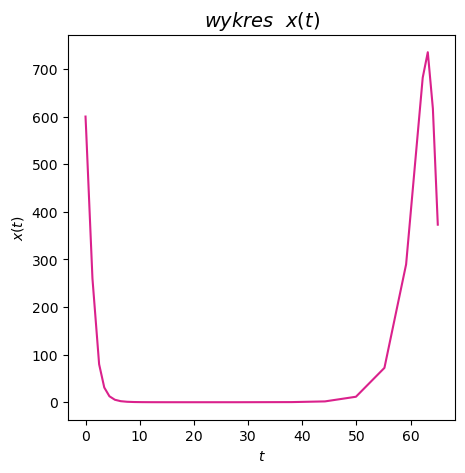

In [336]:
_, axes = plt.subplots(figsize=(5, 5))

axes.plot(solution.t, solution.y[0], '#DA218C')
axes.set_title(r"$wykres \ \  x(t)$", fontsize = 14)
axes.set_xlabel("$t$", fontsize=10)
axes.set_ylabel("$x(t)$", fontsize=10)
plt.show()

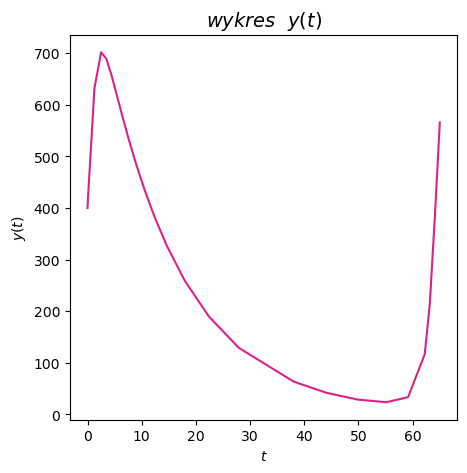

In [337]:
_, axes = plt.subplots(figsize=(5, 5))

axes.plot(solution.t, solution.y[1], '#DA218C')
axes.set_title(r"$wykres \ \ y(t)$", fontsize = 14)
axes.set_xlabel("$t$", fontsize=10)
axes.set_ylabel("$y(t)$", fontsize=10)
plt.show()

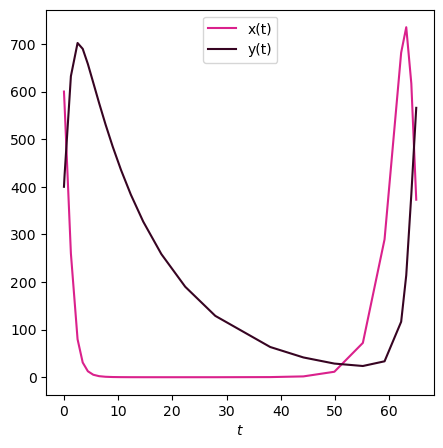

In [339]:
_, axes = plt.subplots(figsize=(5, 5))

axes.plot(solution.t, solution.y[0], '#DA218C', label = "x(t)")
axes.plot(solution.t, solution.y[1], '#370422', label = "y(t)")
axes.set_xlabel("$t$", fontsize=10)
axes.legend()
plt.show()

Wykres pola kierunków z naniesioną trajektorią rozwiązania

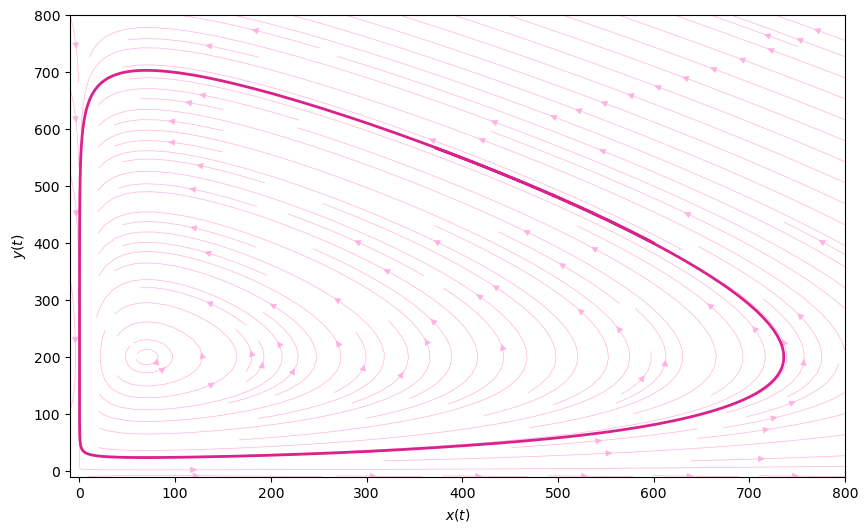

In [345]:
solution = integrate.solve_ivp(lotka_volterra, t_span, warunki_poczatkowe, t_eval = np.linspace(0,65, 1000))

_, axes = plt.subplots(figsize=(10, 6))

x_np = np.linspace(-10, 800, 20)
y_np = np.linspace(-10, 800, 20)
X, Y = np.meshgrid(x_np, y_np)
U = a*X-b*X*Y
V = d*X*Y - c*Y

axes.streamplot(X, Y, U, V, density=1.5, color='#FFB2DF', linewidth=0.5)

axes.plot(solution.y[0], solution.y[1], '#DA218C', lw=2)

axes.set_xlabel("$x(t)$", fontsize=10)
axes.set_ylabel("$y(t)$", fontsize=10)
axes.set_xlim(-10, 800)
axes.set_ylim(-10, 800)

plt.show()